ここには、qiskitの資格試験の模擬試験を振り返ったメモをまとめる

# ブロッホ球のメモ (問2, 6)
- |0>がz軸↑、|1>がz軸↓
- |+>がx軸↑、|->がx軸↓
- |0> + i |1> がy軸↑、|0> - i |1> がy軸↓
- y軸またはx軸に関するθの回転により、|0>がcos(θ/2)、|1>がsin(θ/2) になる

In [3]:
from qiskit import *
import math

# y軸の回転
qc = QuantumCircuit(1)
qc.ry(3 * math.pi/4, 0)
qc.measure_all()

backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend).result()
print(result.get_counts())

{'1': 863, '0': 161}


In [4]:
# x軸の回転
qc = QuantumCircuit(1)
qc.rx(3 * math.pi/4, 0)
qc.measure_all()

backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend).result()
print(result.get_counts())

{'1': 878, '0': 146}


# 測定のコマンド (問4)

- [`qc.measure(qubits, clbits)`](https://qiskit.org/documentation/locale/ja_JP/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.measure)と[`qc.measure_all()`](https://qiskit.org/documentation/locale/ja_JP/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.measure_all)を比較する

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qc = QuantumCircuit(3,3)

qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')

┌─┐      
q_0: ┤M├──────
     └╥┘┌─┐   
q_1: ─╫─┤M├───
      ║ └╥┘┌─┐
q_2: ─╫──╫─┤M├
      ║  ║ └╥┘
c: 3/═╩══╩══╩═
      0  1  2

In [5]:
qc = QuantumCircuit(3,3)

qc.measure_all()
qc.draw(output='mpl')

░ ┌─┐      
   q_0: ─░─┤M├──────
         ░ └╥┘┌─┐   
   q_1: ─░──╫─┤M├───
         ░  ║ └╥┘┌─┐
   q_2: ─░──╫──╫─┤M├
         ░  ║  ║ └╥┘
   c: 3/════╬══╬══╬═
            ║  ║  ║ 
meas: 3/════╩══╩══╩═
            0  1  2

measure_allは測定用ビットを付け加えるので、複数回やるとどんどん増えていく

In [6]:
qc.measure_all()
qc.draw(output='mpl')

░ ┌─┐       ░ ┌─┐      
    q_0: ─░─┤M├───────░─┤M├──────
          ░ └╥┘┌─┐    ░ └╥┘┌─┐   
    q_1: ─░──╫─┤M├────░──╫─┤M├───
          ░  ║ └╥┘┌─┐ ░  ║ └╥┘┌─┐
    q_2: ─░──╫──╫─┤M├─░──╫──╫─┤M├
          ░  ║  ║ └╥┘ ░  ║  ║ └╥┘
    c: 3/════╬══╬══╬═════╬══╬══╬═
             ║  ║  ║     ║  ║  ║ 
 meas: 3/════╩══╩══╩═════╬══╬══╬═
             0  1  2     ║  ║  ║ 
                         ║  ║  ║ 
meas1: 3/════════════════╩══╩══╩═
                         0  1  2

引数`inplace`をFalseにすると、新しい回路を返す

In [10]:
qc = QuantumCircuit(3,3)

qc_m = qc.measure_all(False)

qc_m.draw(output='mpl')

░ ┌─┐      
   q_0: ─░─┤M├──────
         ░ └╥┘┌─┐   
   q_1: ─░──╫─┤M├───
         ░  ║ └╥┘┌─┐
   q_2: ─░──╫──╫─┤M├
         ░  ║  ║ └╥┘
   c: 3/════╬══╬══╬═
            ║  ║  ║ 
meas: 3/════╩══╩══╩═
            0  1  2

In [11]:
# 元の回路は変更されない
qc.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

# 初期化コマンド (問8)

- [`initialize(param, qubit)`](https://qiskit.org/documentation/locale/ja_JP/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.initialize)の使い方を調べる
    - qubitをparamで初期化する
    - qubitは省略することもできる(その場合は設定されているqubitの数と初期化するパラメータの数が対応する必要がある)

In [14]:
import numpy as np
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)
circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)
circuit.draw()

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711,-0.70711) ├
     └──────────────────────────────┘

In [17]:
circuit = QuantumCircuit(1)
circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)])
circuit.draw()

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711,-0.70711) ├
     └──────────────────────────────┘

In [24]:
# 次のコードはパラメータ数とqubit数が合っていない(パラメータ不足)ため、エラーが起きる
# circuit = QuantumCircuit(2)
# circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)])
# circuit.draw()

circuit = QuantumCircuit(2)
circuit.initialize([1/2, -1/2, 1/2, -1/2])
circuit.draw()

┌────────────────────────────────┐
q_0: ┤0                               ├
     │  initialize(0.5,-0.5,0.5,-0.5) │
q_1: ┤1                               ├
     └────────────────────────────────┘

# 位相シフトゲート (問7, 12)

- $Z = \begin{pmatrix}
1 & 0 \\
0 & e^{\pi i}
\end{pmatrix}
= \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}$
- $S = \begin{pmatrix}
1 & 0 \\
0 & e^{\pi i/2}
\end{pmatrix}
= \begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}$
- $T = \begin{pmatrix}
1 & 0 \\
0 & e^{\pi i/4}
\end{pmatrix}
$


# 測定(問14, 15)

coupling_map は何を指定しているのか？
↓で実際に使われていて、実機の結合の情報をコピーする際に使う？
https://qiskit.org/documentation/locale/ja_JP/tutorials/algorithms/03_vqe_simulation_with_noise.html

In [5]:
qc = QuantumCircuit(3)
qasm_sim = Aer.get_backend('qasm_simulator')
couple_map = [[0, 1], [1, 2]]
job = execute(qc, backend=qasm_sim, shots=1024, coupling_map=couple_map)
result = job.result()

In [10]:
job.backend().configuration().coupling_map

# オペレータ(問18)

https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits_advanced/02_operators_overview.html

- 行列(配列やリスト)を引数にとり、インスタンスを生成できる
- 次のインスタンスからの変換もできる
    - Pauli オブジェクト
    - Gate と Instruction オブジェクト
    - QuantumCircuits オブジェクト

In [14]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
from qiskit.extensions import RXGate, XGate, CXGate

pauliXX = Pauli(label='XX')

Operator(pauliXX)

C:\Users\ohno\Anaconda3\envs\quantum\lib\site-packages\qiskit\quantum_info\operators\symplectic\pauli.py:187: DeprecationWarning: Initializing Pauli from `Pauli(label=l)` kwarg is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. Use `Pauli(l)` instead.
  base_z, base_x, base_phase = self._from_label_deprecated(label)


Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

オペレータを回路内に入れることもできる


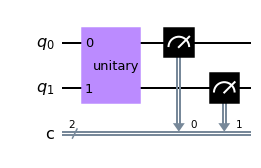

In [15]:
# Create an operator
XX = Operator(Pauli(label='XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
circ.draw('mpl')